In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bm3dornl.bm3d import bm3d_ring_artifact_removal_ms

In [2]:
with open("../tests/bm3dornl-data/sino.npy", "rb") as f:
    sino_noisy = np.load(f)

print("sino_noisy.shape:", sino_noisy.shape)

sino_noisy.shape: (720, 725)


In [3]:
block_matching_kwargs: dict = {
    "patch_size": (8, 8),
    "stride": 3,
    "background_threshold": 0.0,
    "cut_off_distance": (64, 64),
    "num_patches_per_group": 32,
    "padding_mode": "circular",
}
filter_kwargs: dict = {
    "filter_function": "fft",
    "shrinkage_factor": 3e-2,
}
kwargs = {
    "mode": "simple",
    "k": 4,
    "block_matching_kwargs": block_matching_kwargs,
    "filter_kwargs": filter_kwargs,
}

In [4]:
sino_bm3dornl = bm3d_ring_artifact_removal_ms(
    sinogram=sino_noisy,
    **kwargs,
)

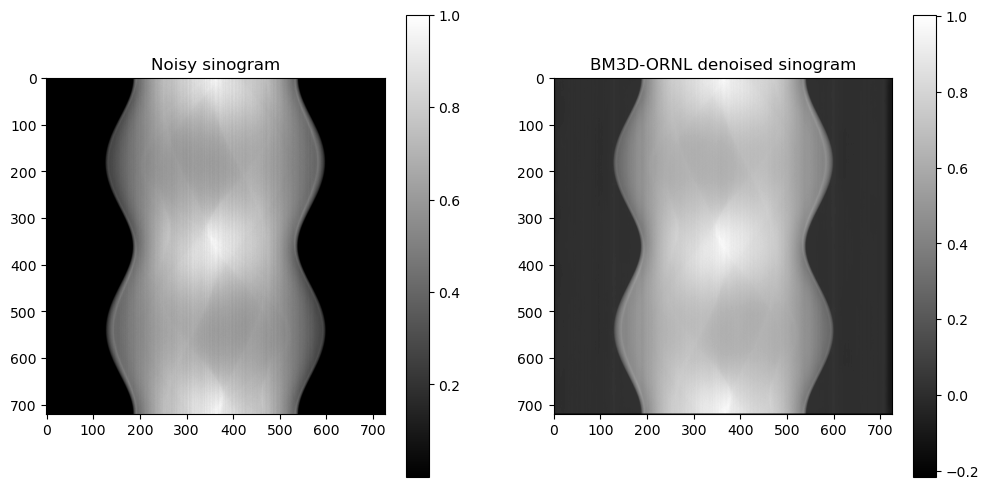

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sino_noisy, cmap="gray")
plt.title("Noisy sinogram")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(sino_bm3dornl, cmap="gray")
plt.title("BM3D-ORNL denoised sinogram")
plt.colorbar()
plt.show()